## Лабораторная работа 2019 Чубанов Даниил ПМ2-3

In [2]:
#Имортируем все нужные нам в ходе работы библиотеки и подготавливаем рабочую базу

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# init_notebook_mode()
sns.set()

In [3]:
# Сохраням ранне загруженны тикеры с сайта Финам в файл с именем тикера и импортируем его используя библиотеку Pandas.
# Наши файлы будет записан в новый DataFrame (по сути таблицу с ключевым столбцом)
# Используем параметр parse_dates для автоматического преобразования дат для дальнейшей работы с ними
# Удалим столбец Time за недобностью (он принимает нулевые значения)

tickersAKRN = pd.read_csv("/Users/daniilcubanov/Desktop/lab_data/AKRN.csv", parse_dates=[2]).drop('<TIME>', axis=1).drop("<PER>",axis=1)
tickersMTSS = pd.read_csv("/Users/daniilcubanov/Desktop/lab_data/MTSS.csv", parse_dates=[2]).drop('<TIME>', axis=1).drop("<PER>",axis=1)
tickersPLZL = pd.read_csv("/Users/daniilcubanov/Desktop/lab_data/PLZL.csv", parse_dates=[2]).drop('<TIME>', axis=1).drop("<PER>",axis=1)
tickersUTAR = pd.read_csv("/Users/daniilcubanov/Desktop/lab_data/UTAR.csv", parse_dates=[2]).drop('<TIME>', axis=1).drop("<PER>",axis=1)
tickersVTBR = pd.read_csv("/Users/daniilcubanov/Desktop/lab_data/VTBR.csv", parse_dates=[2]).drop('<TIME>', axis=1).drop("<PER>",axis=1)

# Обьединяем наши датафреймы в один
tickers = pd.merge(pd.merge(pd.merge(pd.merge(tickersAKRN,tickersMTSS, how="outer"),tickersPLZL, how="outer"), tickersUTAR, how="outer"),tickersVTBR, how="outer") 
# Сделаем  столбец тикеров ключевым, а старый удалим из датафрейма 
# (по идее его можно было бы назначить ключевым при записи, но у меня индексируемый столбец при этом почему-то пропадает)
tickers.index = [tickers["<TICKER>"]]
tickers=tickers.drop('<TICKER>', axis=1)
tickers



FileNotFoundError: [Errno 2] File b'/Users/daniilcubanov/Desktop/lab_data/AKRN.csv' does not exist: b'/Users/daniilcubanov/Desktop/lab_data/AKRN.csv'

## Задание 1. Таблица числа торговых дней по компаниям варианта для каждого календарного года за весь период


In [4]:
#Воспользуемся методом .pivot_table для создания нужной нам таблицы
tickersDaysCountTable = tickers.pivot_table( index=['<TICKER>'], columns=[pd.DatetimeIndex(tickers['<DATE>']).year], values=['<DATE>'],aggfunc='count').fillna('0').astype(int)
tickersDaysCountTable = tickersDaysCountTable.rename(columns={'<DATE>': 'Число торговых дней по годам'})
tickersDaysCountTable


Число торговых дней по годам                                          \
<DATE>                           2003 2004 2005 2006 2007 2008 2009 2010 2011   
<TICKER>                                                                        
AKRN                                0    0    0   50  248  245  249  248  248   
MTSS                               46  250  248  248  248  246  249  248  248   
PLZL                                0    0    0  164  248  246  249  248  248   
UTAR                                0    0  217  245  248  246  249  248  247   
VTBR                                0    0    0    0  153  246  249  248  248   

                                             
<DATE>   2012 2013 2014 2015 2016 2017 2018  
<TICKER>                                     
AKRN      255  250  250  250  252  252  254  
MTSS      255  250  241  250  252  252  254  
PLZL      255  250  250  250  252  252  254  
UTAR      244  221  236  250  252  252  246  
VTBR      255  250  250  250  252  252  254

## Задание 2. Таблица годовых стоимостных объемов торгов по компаниям варианта за весь период.

In [5]:
#создадим новый датафрейм для дальнейшей раьоты с ним, скопировав в него исходный. 
#Затем создадим в нем новый столбец со произведением цены закрытия на объем продаж/10^9
tickersEdited=tickers
tickersEdited['<VOLxCLOSE>']=(tickersEdited['<VOL>']*tickersEdited['<CLOSE>'])/1000000000
#заново восаользуемся методом .pivot_table
tickersVolCountTable = tickersEdited.pivot_table( index=['<TICKER>'], columns=[pd.DatetimeIndex(tickersEdited['<DATE>']).year], values=['<VOLxCLOSE>'],aggfunc='sum').fillna(int(0)).round(1)
tickersVolCountTable=tickersVolCountTable.rename(columns={'<VOLxCLOSE>': 'Годовые стоимостные объемы торгов в млрд рублей'})
tickersVolCountTable

Годовые стоимостные объемы торгов в млрд рублей                  \
<DATE>                                              2003 2004 2005  2006   
<TICKER>                                                                   
AKRN                                                 0.0  0.0  0.0   0.1   
MTSS                                                 0.1  1.3  8.7  45.2   
PLZL                                                 0.0  0.0  0.0  26.8   
UTAR                                                 0.0  0.0  0.1   0.3   
VTBR                                                 0.0  0.0  0.0   0.0   

                                                                         \
<DATE>     2007   2008   2009   2010   2011   2012   2013   2014   2015   
<TICKER>                                                                  
AKRN        1.0    5.9    6.0    8.4   13.7    6.2    4.5    4.7    5.5   
MTSS       90.7   91.2   41.8   56.1   67.8   75.6  100.4  206.3  154.6   
PLZL      104.8  121.2  102.3   60.3   60.5    9.9    4.7    4.6    6.9   
UTAR        0.6    0.3    0.3    0.3    0.5    0.6    1.3    0.6    0.3   
VTBR      227.2  549.8  663.5  642.7  658.4  495.2  483.8  564.1  407.9   

                               
<DATE>     2016   2017   2018  
<TICKER>                       
AKRN        4.6    4.8    4.7  
MTSS      147.6  122.7  139.0  
PLZL        5.5   33.9   55.5  
UTAR        0.1    0.1    0.0  
VTBR      254.3  184.8  259.2

## Задание 3. График цены закрытия первой компании за весь период. (двойное нажатие для увеличение графика)

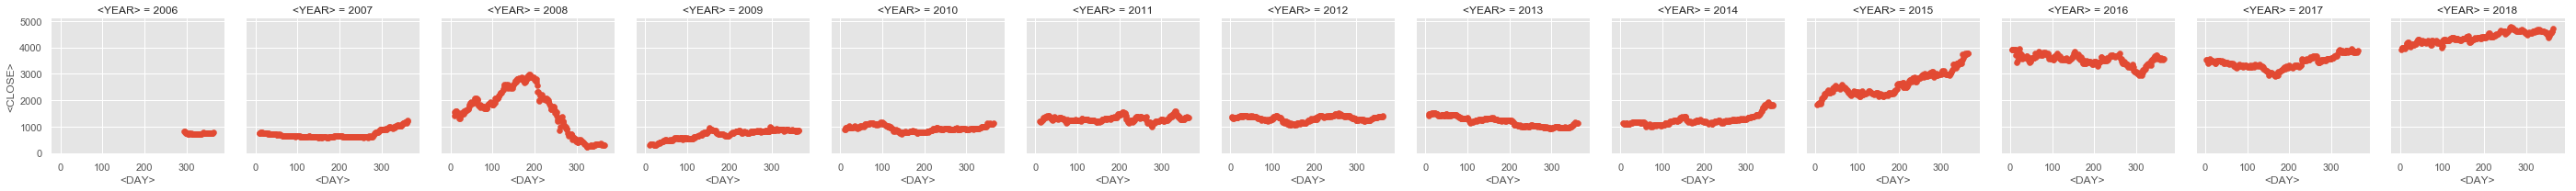

In [6]:
#Добавим к нашему датафреуму новые столбцы с годом и днем года
tickersEdited["<YEAR>"]=pd.DatetimeIndex(tickersEdited['<DATE>']).year
tickersEdited['<DAY>']=pd.DatetimeIndex(tickersEdited['<DATE>']).dayofyear
#Создадим новый датафрейм с показателями только первой компании и сделаем индексным столбцом показатели года
tickersCloseCount=tickersEdited.loc['AKRN']
tickersCloseCount.index = [tickersCloseCount["<YEAR>"]]

plt.style.use('ggplot')
allYearsGraph = sns.FacetGrid(tickersCloseCount, col="<YEAR>")
allYearsGraph.map(plt.scatter,"<DAY>", "<CLOSE>")
allYearsGraph





## Задание 4. Эмпирическая корреляционная 5х5 матрица дневных логарифмических доходностей всех компаний варианта за весь период

In [1]:
tickersLog = tickers.drop(columns=["<OPEN>","<HIGH>","<LOW>","<VOL>", "<VOLxCLOSE>" , '<DATE>', "<YEAR>", "<DAY>"])

# def ForCorrMatrixFn(ticker_index):
#     tickerDF=ticker_index.reset_index(drop=True)
#     tickerDF["<PREVCLOSE>"] = tickerDF["<CLOSE>"].shift(1)
#     tickerDF = tickerDF[1:]
#     tickerDF["<LOG_INCOME>"] = np.log(tickerDF['<CLOSE>'].astype(int)/(tickerDF['<PREVCLOSE>'].astype(int)))
#     tickerDF["<LOG_INCOME>"]= tickerDF["<LOG_INCOME>"]
#     tickerDF = tickerDF.drop(columns=["<PREVCLOSE>","<CLOSE>"])
#     return tickerDF

# tickersLogAKRN=(ForCorrMatrixFn(tickersLog.loc['AKRN']))["<LOG_INCOME>"]
# tickersLogMTSS=(ForCorrMatrixFn(tickersLog.loc['MTSS']))["<LOG_INCOME>"]
# tickersLogPLZL=(ForCorrMatrixFn(tickersLog.loc['PLZL']))["<LOG_INCOME>"]
# tickersLogUTAR=(ForCorrMatrixFn(tickersLog.loc['UTAR']))["<LOG_INCOME>"]

tickersLogAKRN=(np.log((tickersLog.loc['AKRN']).pct_change()+1)).dropna()
tickersLogMTSS=(np.log((tickersLog.loc['MTSS']).pct_change()+1)).dropna()
tickersLogPLZL=(np.log((tickersLog.loc['PLZL']).pct_change()+1)).dropna()
tickersLogUTAR=(np.log((tickersLog.loc['UTAR']).pct_change()+1)).dropna()


# correlationMatrix = pd.DataFrame({'AKRN': tickersLogAKRN['<CLOSE>'].tolist(), 'MTSS': tickersLogMTSS['<CLOSE>'].tolist(), 'PLZL': tickersLogPLZL['<CLOSE>'].tolist(), 'UTAR': tickersLogUTAR['<CLOSE>'].tolist()}).corr(method='pearson')
# sns.heatmap(correlationMatrix)
# plt.title('Тепловая карта корреляционной матрицы')
print(correlationMatrix)


NameError: name 'tickers' is not defined

## Задание 5. Таблица интервальных частот дневной логарифмической доходности первой компании за последний полный календарный год

In [97]:
#Подготовим наш датафрейм
tickersAKRN=tickers.loc['AKRN']
tickersAKRN.index=[pd.DatetimeIndex(tickersAKRN['<DATE>']).year]
tickersAKRN2018=tickersAKRN.loc[2018]
#Определим оптимальное кол-во интервалов по правилу Сэвиджа
n=int(1+np.floor(np.log2(len(tickersAKRN2018))))
tickersAKRN2018.index=[tickersAKRN2018["<DATE>"]]
#Воспользуемя ранее написанной функцией
tickersLogAKRN2018=tickersAKRN2018.drop(columns=["<OPEN>","<HIGH>","<LOW>","<VOL>", "<VOLxCLOSE>", '<DATE>'])
tickersLogAKRN2018=pd.DataFrame(ForCorrMatrixFn(tickersLogAKRN2018)["<LOG_INCOME>"])
#Найдем точки отрезков и зададим сами отрезки
intervalsDots=np.linspace(min(tickersLogAKRN2018["<LOG_INCOME>"]),max(tickersLogAKRN2018["<LOG_INCOME>"]),n+1)
segments = [('[{}, {}]').format(round(intervalsDots[x], 3), round(intervalsDots[x+1], 3)) for x in range(n)]
#Подсчитаем кол-во входов в каждый промежуток (частоту)
freq = [tickersLogAKRN2018["<LOG_INCOME>"][(tickersLogAKRN2018["<LOG_INCOME>"] >= intervalsDots[x]) & (tickersLogAKRN2018["<LOG_INCOME>"] < intervalsDots[x+1])].count() for x in range(n)]
#Строим таблицу
pd.DataFrame({'Интервал':segments, 'Частота': freq})


,Интервал,Частота
0,"[-0.038, -0.028]",2
1,"[-0.028, -0.019]",4
2,"[-0.019, -0.009]",14
3,"[-0.009, 0.0]",98
4,"[0.0, 0.01]",104
5,"[0.01, 0.019]",26
6,"[0.019, 0.029]",3
7,"[0.029, 0.038]",1
